# Data fields:

## Data Dictionary:

Variable&emsp;&emsp;&emsp;&emsp;Definition&emsp;&emsp;&emsp;&emsp;Key  
survival&emsp;&emsp;&emsp;&emsp;Survival&emsp;&emsp;&emsp;&emsp;0 = No, 1 = Yes  
pclass&emsp;&emsp;&emsp;&emsp;Ticket class&emsp;&emsp;&emsp;&emsp;1 = 1st, 2 = 2nd, 3 = 3rd  
sex&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Sex  	
Age&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Age&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;in years  	
sibsp&emsp;&emsp;&emsp;# of siblings / spouses aboard the Titanic  
parch&emsp;&emsp;&emsp;# of parents / children aboard the Titanic  
ticket&emsp;&emsp;&emsp;&emsp;&emsp;Ticket number  
fare&emsp;&emsp;&emsp;&emsp;&emsp;Passenger fare  
cabin&emsp;&emsp;&emsp;&emsp;&emsp;Cabin number  	
embarked&emsp;&emsp;&emsp;Port of Embarkation&emsp;&emsp;C = Cherbourg, Q = Queenstown, S = Southampton  

## Variable Notes:

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

parch: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.


# -----------------------------------------------------------------------------------------------------

# Importation Datas

# -----------------------------------------------------------------------------------------------------

In [1]:
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
from scipy import stats

%matplotlib inline
sns.set()
warnings.filterwarnings('ignore')

In [2]:
base_path = os.path.join('../input/train.csv')
base_path

'../input/train.csv'

In [3]:
df = pd.read_csv(base_path)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**It seems there are NaN values in Age and Embarked columns.**

# -----------------------------------------------------------------------------------------------------

# EDA

# -----------------------------------------------------------------------------------------------------

## Use PassengerID column like index

In [7]:
df = df.set_index(df['PassengerId'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Remove PassengerId column

In [8]:
df = df.drop(labels='PassengerId', axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Remove Name column

In [9]:
df = df.drop(labels='Name', axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


## Remove Ticket column

In [10]:
df = df.drop(labels='Ticket', axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S


## Remove Cabin column

In [11]:
df = df.drop(labels='Cabin', axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


# Univariate Analysis

## Survived distribution

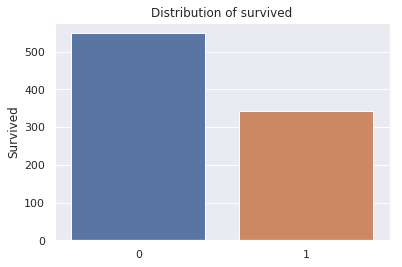

In [12]:
sns.barplot(x=df['Survived'].unique(), y=df['Survived'].value_counts())
plt.title('Distribution of survived');

In [13]:
Purcent_of_died = df['Survived'][df['Survived'] == 0].count()
Purcent_of_survived = df['Survived'][df['Survived'] == 1].count()
Total = df['Survived'].count()

print("Purcent of died: {}%".format((Purcent_of_died / Total * 100).round(0)))
print("Purcent of survived: {}%".format((Purcent_of_survived / Total * 100).round(0)))

Purcent of died: 62.0%
Purcent of survived: 38.0%


**About 2/3 of people died.**

## P-Class distribution

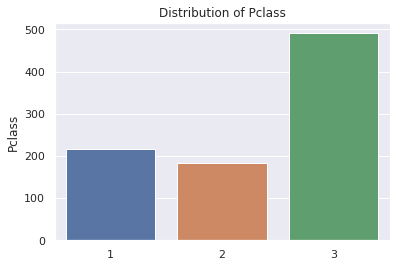

In [14]:
sns.barplot(x=df['Pclass'].unique(), y=df['Pclass'].value_counts())
plt.title('Distribution of Pclass');

In [15]:
Purcent_of_class_1 = df['Pclass'][df['Pclass'] == 1].count()
Purcent_of_class_2 = df['Pclass'][df['Pclass'] == 2].count()
Purcent_of_class_3 = df['Pclass'][df['Pclass'] == 3].count()
Total = df['Pclass'].count()

print("Purcent_of_class_1: {}%".format((Purcent_of_class_1 / Total * 100).round(0)))
print("Purcent_of_class_2: {}%".format((Purcent_of_class_2 / Total * 100).round(0)))
print("Purcent_of_class_3: {}%".format((Purcent_of_class_3 / Total * 100).round(0)))

Purcent_of_class_1: 24.0%
Purcent_of_class_2: 21.0%
Purcent_of_class_3: 55.0%


**More than half of people was in Pclass 3.**

## Sex distribution

In [16]:
df = df.replace(to_replace='male', value=1)

In [17]:
df = df.replace(to_replace='female', value=2)

In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,S
2,1,1,2,38.0,1,0,71.2833,C
3,1,3,2,26.0,0,0,7.9250,S
4,1,1,2,35.0,1,0,53.1000,S
5,0,3,1,35.0,0,0,8.0500,S


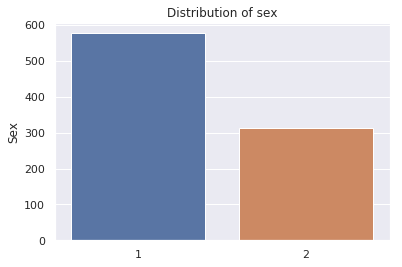

In [19]:
sns.barplot(x=df['Sex'].unique(), y=df['Sex'].value_counts())
plt.title('Distribution of sex');

In [20]:
Purcent_of_male = df['Sex'][df['Sex'] == 1].count()
Purcent_of_female = df['Sex'][df['Sex'] == 2].count()
Total = df['Sex'].count()

print("Purcent_of_male: {}%".format((Purcent_of_male / Total * 100).round(0)))
print("Purcent_of_female: {}%".format((Purcent_of_female / Total * 100).round(0)))

Purcent_of_male: 65.0%
Purcent_of_female: 35.0%


**About 2/3 of male of board.**

## Age distribution

### Missing values Imputation on Age column with median

In [21]:
df['Age'].isnull().values.any()

True

In [22]:
imput_value = df['Age'].median()

In [23]:
df.loc[df['Age'].isna(), 'Age'] = imput_value

In [24]:
df['Age'].isnull().values.any()

False

In [25]:
df['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

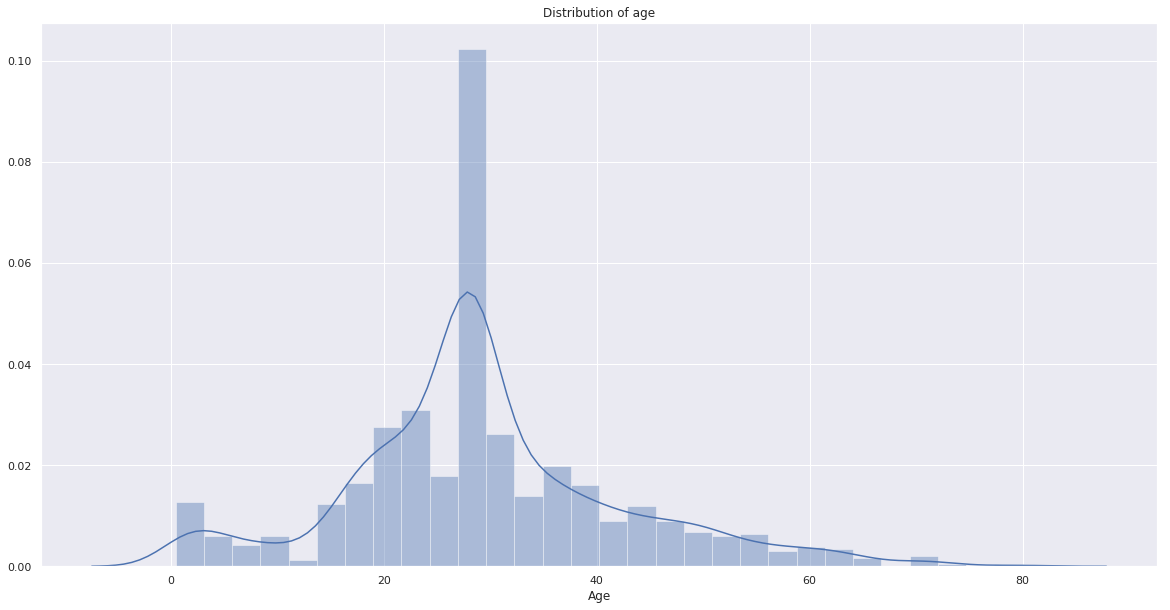

In [26]:
fig, _ = plt.subplots(figsize=(20, 10))
sns.distplot(df['Age'])
plt.title('Distribution of age');

**High representation around 30 but it seems to be a normal distribution.**

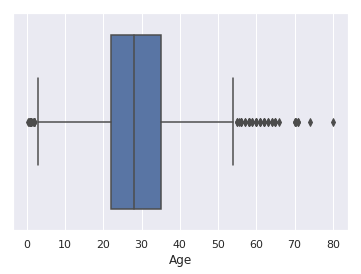

In [27]:
sns.boxplot(df['Age']);

## Interquartile Range

In [28]:
Q1 = 22.0
Q3 = 35.0
IQR = Q3 - Q1
IQR

13.0

In [29]:
low_IQR = Q1 - (1.5 * IQR)
low_IQR

2.5

**All people younger than 3 are outliers.**

In [30]:
high_IQR = (1.5 * IQR) + Q3
high_IQR

54.5

**All people older than 55 are outliers.**

In [31]:
young_outliers = df['Age'][df['Age'] <= 3].count()
old_outliers = df['Age'][df['Age'] >= 55].count()
print("Young outliers: {} and old outliers: {}".format(young_outliers, old_outliers))
Total_age_outliers = young_outliers + old_outliers
print("Total age outliers: {}".format(Total_age_outliers))

Young outliers: 30 and old outliers: 42
Total age outliers: 72


**There is about 8% of outliers (72/891).**

## Sibling/Spouse distribution

Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)

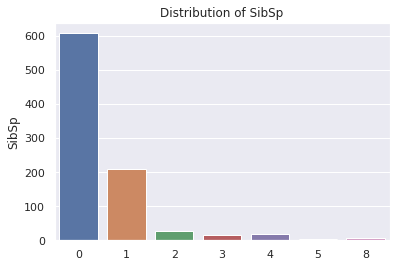

In [32]:
sns.barplot(x=df['SibSp'].value_counts().index, y=df['SibSp'].value_counts())
plt.title('Distribution of SibSp');

In [33]:
Purcent_of_SibSp_0 = df['SibSp'][df['SibSp'] == 0].count()
Purcent_of_SibSp_1 = df['SibSp'][df['SibSp'] == 1].count()
Purcent_of_SibSp_2 = df['SibSp'][df['SibSp'] == 2].count()
Purcent_of_SibSp_3 = df['SibSp'][df['SibSp'] == 3].count()
Purcent_of_SibSp_4 = df['SibSp'][df['SibSp'] == 4].count()
Purcent_of_SibSp_5 = df['SibSp'][df['SibSp'] == 5].count()
Purcent_of_SibSp_8 = df['SibSp'][df['SibSp'] == 8].count()

Total = df['SibSp'].count()


print("Purcent_of_SibSp_0: {}%".format((Purcent_of_SibSp_0 / Total * 100).round(0)))
print("Purcent_of_SibSp_1: {}%".format((Purcent_of_SibSp_1 / Total * 100).round(0)))
print("Purcent_of_SibSp_2: {}%".format((Purcent_of_SibSp_2 / Total * 100).round(0)))
print("Purcent_of_SibSp_3: {}%".format((Purcent_of_SibSp_3 / Total * 100).round(0)))
print("Purcent_of_SibSp_4: {}%".format((Purcent_of_SibSp_4 / Total * 100).round(0)))
print("Purcent_of_SibSp_5: {}%".format((Purcent_of_SibSp_5 / Total * 100).round(0)))
print("Purcent_of_SibSp_8: {}%".format((Purcent_of_SibSp_8 / Total * 100).round(0)))

Purcent_of_SibSp_0: 68.0%
Purcent_of_SibSp_1: 23.0%
Purcent_of_SibSp_2: 3.0%
Purcent_of_SibSp_3: 2.0%
Purcent_of_SibSp_4: 2.0%
Purcent_of_SibSp_5: 1.0%
Purcent_of_SibSp_8: 1.0%


**It seems about 7/10 people was single on board (and without brother or sister).**

## Parch distribution

Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.

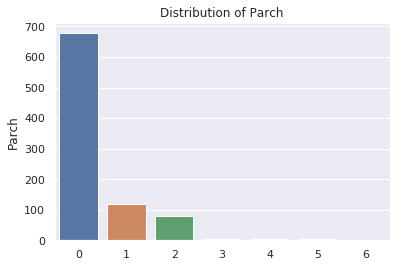

In [34]:
sns.barplot(x=df['Parch'].value_counts().index, y=df['Parch'].value_counts())
plt.title('Distribution of Parch');

In [35]:
Purcent_of_Parch_0 = df['Parch'][df['Parch'] == 0].count()
Purcent_of_Parch_1 = df['Parch'][df['Parch'] == 1].count()
Purcent_of_Parch_2 = df['Parch'][df['Parch'] == 2].count()
Purcent_of_Parch_3 = df['Parch'][df['Parch'] == 3].count()
Purcent_of_Parch_4 = df['Parch'][df['Parch'] == 4].count()
Purcent_of_Parch_5 = df['Parch'][df['Parch'] == 5].count()
Purcent_of_Parch_6 = df['Parch'][df['Parch'] == 6].count()

Total = df['Parch'].count()


print("Purcent_of_Parch_0: {}%".format((Purcent_of_Parch_0 / Total * 100).round(0)))
print("Purcent_of_Parch_1: {}%".format((Purcent_of_Parch_1 / Total * 100).round(0)))
print("Purcent_of_Parch_2: {}%".format((Purcent_of_Parch_2 / Total * 100).round(0)))
print("Purcent_of_Parch_3: {}%".format((Purcent_of_Parch_3 / Total * 100).round(0)))
print("Purcent_of_Parch_4: {}%".format((Purcent_of_Parch_4 / Total * 100).round(0)))
print("Purcent_of_Parch_5: {}%".format((Purcent_of_Parch_5 / Total * 100).round(0)))
print("Purcent_of_Parch_6: {}%".format((Purcent_of_Parch_6 / Total * 100).round(0)))

Purcent_of_Parch_0: 76.0%
Purcent_of_Parch_1: 13.0%
Purcent_of_Parch_2: 9.0%
Purcent_of_Parch_3: 1.0%
Purcent_of_Parch_4: 0.0%
Purcent_of_Parch_5: 1.0%
Purcent_of_Parch_6: 0.0%


**It seems 3/4 of people was without parents & child.**

## Fare distribution

In [36]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

**It seems there are outliers in this column.**

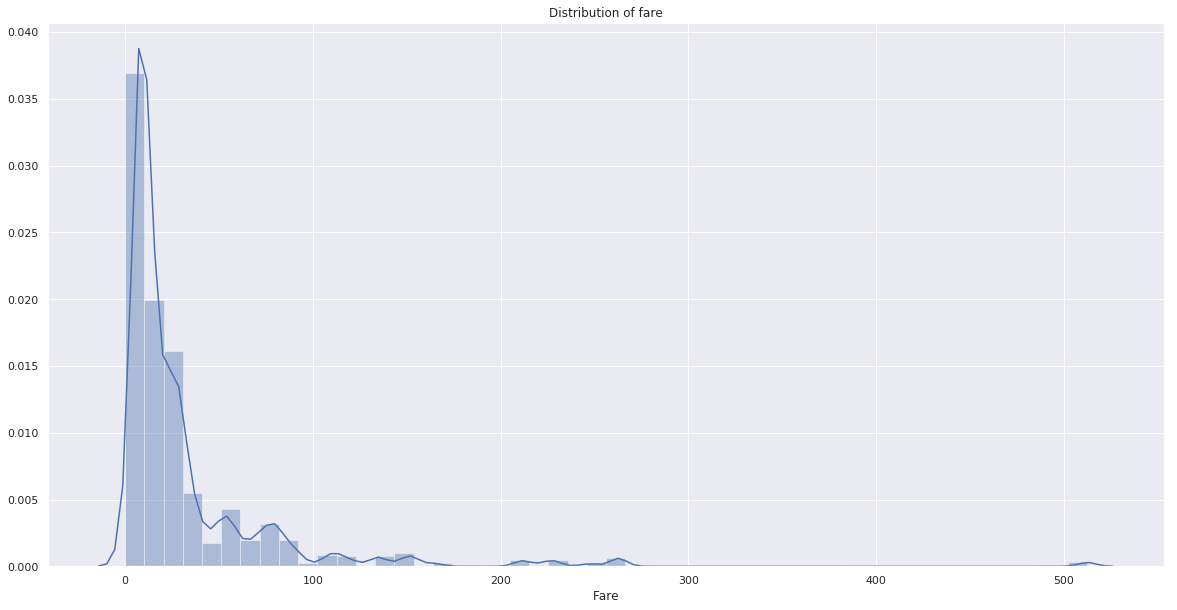

In [37]:
fig, _ = plt.subplots(figsize=(20, 10))
sns.distplot(df['Fare'])
plt.title('Distribution of fare');

**75% of the fare was under 31$.**

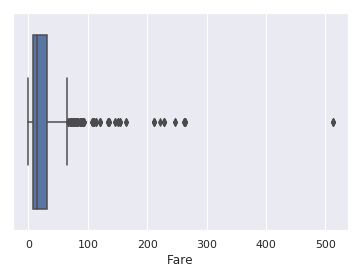

In [38]:
sns.boxplot(df['Fare']);

**There are some outliers here.**

## Interquartile Range

In [39]:
Q1 = 7.910400
Q3 = 31.000000
IQR = Q3 - Q1
IQR

23.0896

In [40]:
high_IQR = (1.5 * IQR) + Q3
high_IQR

65.6344

**All fares higher than 66$ are outliers.**

In [41]:
fare_outliers = df['Fare'][df['Fare'] >= 66]
fare_outliers.count()

116

**There is about 13% of outliers (116/891).**

## Embarked distribution

C = Cherbourg, Q = Queenstown, S = Southampton

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


**It seems 2 rows on this column are not available.**

In [43]:
df.loc[df['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
62,1,1,2,38.0,0,0,80.0,NaN
830,1,1,2,62.0,0,0,80.0,NaN


**I decided to remove these two rows.**

In [44]:
df = df.drop([62, 830])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null int64
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 62.5+ KB


In [46]:
df= df.replace(to_replace='S', value=1)

In [47]:
df= df.replace(to_replace='C', value=2)

In [48]:
df= df.replace(to_replace='Q', value=3)

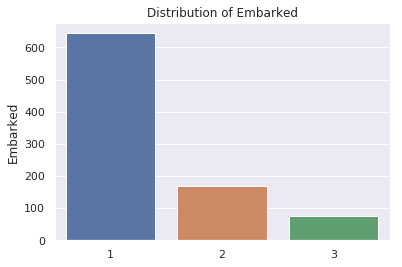

In [49]:
sns.barplot(x=df['Embarked'].value_counts().index, y=df['Embarked'].value_counts())
plt.title('Distribution of Embarked');

In [50]:
Purcent_of_Embarked_S = df['Embarked'][df['Embarked'] == 1].count()
Purcent_of_Embarked_C = df['Embarked'][df['Embarked'] == 2].count()
Purcent_of_Embarked_Q = df['Embarked'][df['Embarked'] == 3].count()

Total = df['Embarked'].count()

print("Purcent_of_Embarked_S: {}%".format((Purcent_of_Embarked_S / Total * 100).round(0)))
print("Purcent_of_Embarked_C: {}%".format((Purcent_of_Embarked_C / Total * 100).round(0)))
print("Purcent_of_Embarked_Q: {}%".format((Purcent_of_Embarked_Q / Total * 100).round(0)))

Purcent_of_Embarked_S: 72.0%
Purcent_of_Embarked_C: 19.0%
Purcent_of_Embarked_Q: 9.0%


**It seems about 3/4 of people embarked at Southampton.**

# Multivariate Analysis

## Heatmap - spearman method

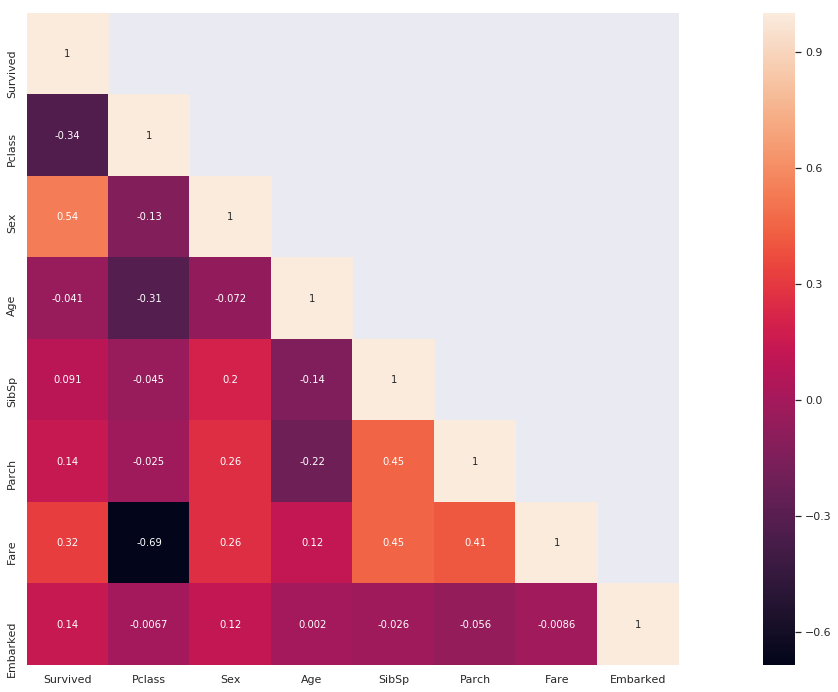

In [51]:
cor_mat = df[:].corr(method='spearman')
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True);

We have correlations between (corr >= 0.1):  
- Survived & Sex
- Survived & Parch
- Survived & Fare
- Survived & Embarked
- Sex & SibSp
- Sex & Parch
- Sex & Fare
- Sex & Embarked
- Age & Fare
- SibSp & Parch
- SibSp & Fare
- Parch & Fare

## Survived & Sex features

1 -> men  
2 -> women

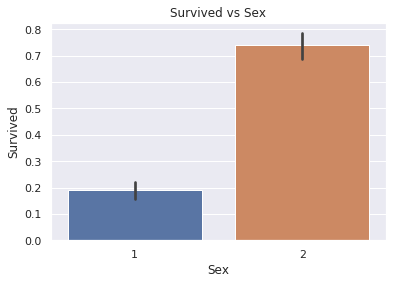

In [52]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survived vs Sex');

**It seems women had a better survival rate than men.**

## Survived & Parch features

Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.

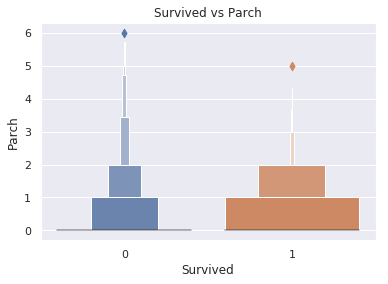

In [53]:
sns.boxenplot(x=df['Survived'], y=df['Parch'])
plt.title('Survived vs Parch');

**It seems that people most survived had between 0 and 2 Parch.**

## Survived & Fare features

0 -> dead  
1 -> survived

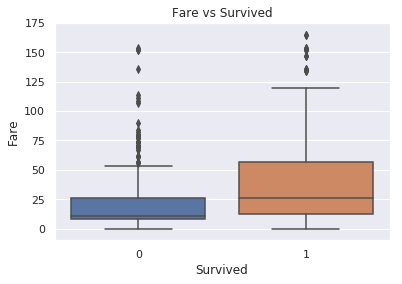

In [54]:
ax = sns.boxplot(x=df['Survived'], y=df['Fare'])
ax.set(ylim=(-10, 175))
plt.title('Fare vs Survived');

**It seems that people who paid high fare had more chances to survive.**

## Survived & Embarked features

1 -> S (72%)  
2 -> C (19%)  
3 -> Q (9%)

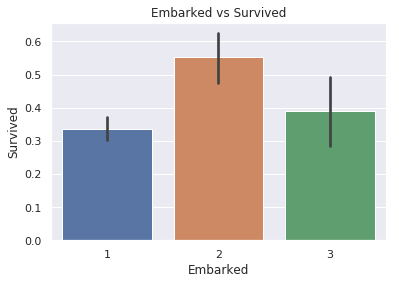

In [55]:
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Embarked vs Survived');

**It seems people had embarked in C had better chances to survive than S or Q.**

In [56]:
cross_table = pd.crosstab(df['Survived'], df['Embarked'])
cross_table

Embarked,1,2,3
Survived,,,
0,427,75,47
1,217,93,30


In [57]:
chi2, p_val, _, _ = stats.chi2_contingency(cross_table)
print('chi2: {}, p_value: {}'.format(chi2, p_val))

chi2: 26.48914983923762, p_value: 1.769922284120912e-06


**p_value << 0.01 => we reject the null hypothesis. The survival rate is influenced by the boat harbor.**

## Sex & SibSp features

Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored) 

Sex:  
1 -> men  
2 -> women  

Survived:  
0 -> dead  
1 -> Survived

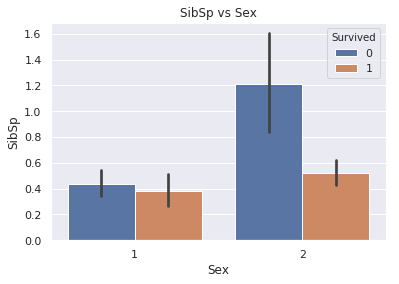

In [58]:
sns.barplot(x='Sex', y='SibSp', hue='Survived', data=df)
plt.title('SibSp vs Sex');

**It seems women were more accompanied by Sibing or Spouse than men but most part of them are dead during the sinking.**

## Sex & Parch features

Sex:  
1 -> men  
2 -> women  

Parch:  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson

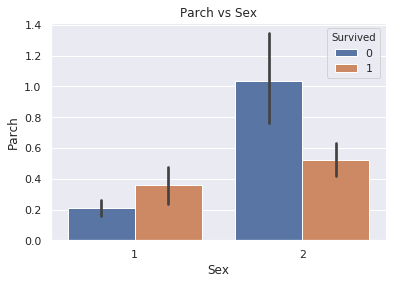

In [59]:
sns.barplot(x='Sex', y='Parch', hue='Survived', data=df)
plt.title('Parch vs Sex');

**It seems women were more accompanied by a parent or a child than men but most part of them are dead durong the sinking.**

## Sex & Fare features

Sex:  
1 -> men  
2 -> women

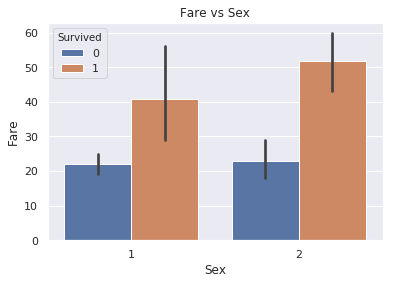

In [60]:
sns.barplot(x='Sex', y='Fare', hue='Survived', data=df)
plt.title('Fare vs Sex');

**It seems women had higher fare than men and most of them survived during the sinking.** 

## Sex & Embarked features

Embarked:  
1 -> S  
2 -> C  
3 -> Q  

Survived:  
0 -> dead  
1 -> survived  

Sex:  
1 -> men  
2 -> women

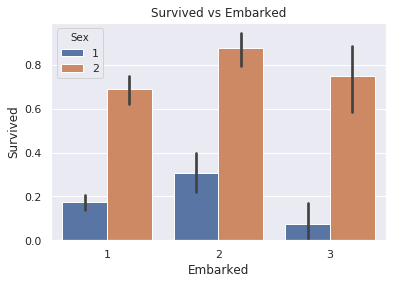

In [61]:
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=df)
plt.title('Survived vs Embarked');

**It seems people who embarked in C had more chances to survive and this is especially true for women.**

## Age & Fare features

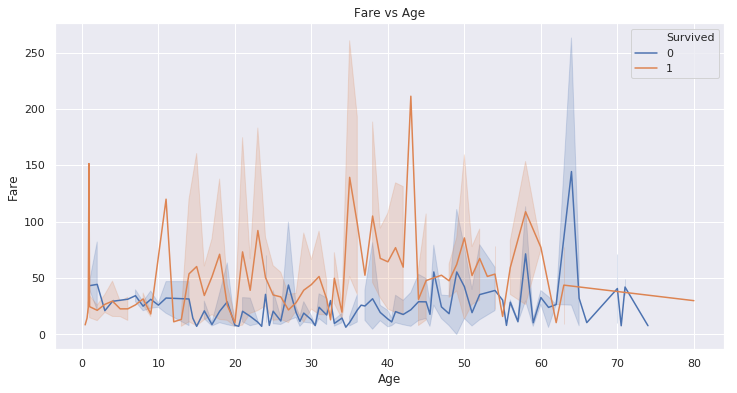

In [62]:
fig, _ = plt.subplots(figsize=(12, 6))
sns.lineplot(x=df['Age'], y=df['Fare'], hue=df['Survived'])
plt.title('Fare vs Age');

**It seems people older than 35 paid more fare than the others and this feature had influenced the survival rate.**

## SibSp & Parch features

Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.

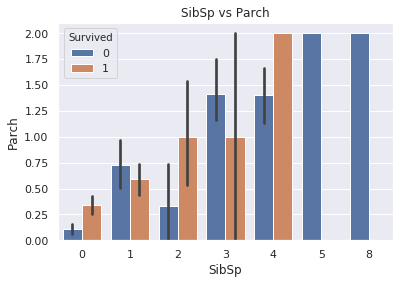

In [63]:
sns.barplot(x='SibSp', y='Parch', hue='Survived', data=df)
plt.title('SibSp vs Parch');

**Up to 5 members in a family, the survival rate is null.**

## SibSp & Fare features

Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)

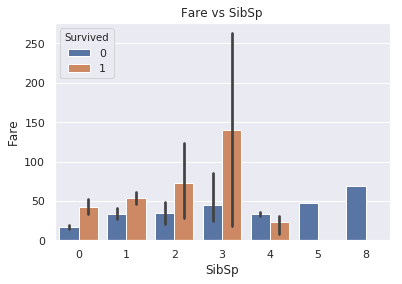

In [64]:
sns.barplot(x='SibSp', y='Fare', hue='Survived', data=df)
plt.title('Fare vs SibSp');

**Most people survived for higher fare until SibSp <= 3. After that, most people died even for high fare.**

## Parch & Fare features

Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.

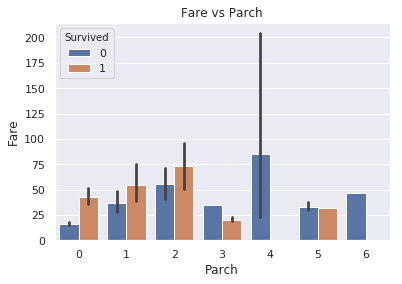

In [65]:
sns.barplot(x='Parch', y='Fare', hue='Survived', data=df)
plt.title('Fare vs Parch');

**Most people survived for 2 Parch max.**

# -----------------------------------------------------------------------------------------------------

# Features Engineering

# -----------------------------------------------------------------------------------------------------

In [66]:
df['Sex*Fare'] = df['Sex'] * df['Fare']

In [67]:
df['Fare/Sex'] = df['Fare'] / df['Sex']

In [68]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex*Fare,Fare/Sex
PassengerId,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,1,7.2500,7.25000
2,1,1,2,38.0,1,0,71.2833,2,142.5666,35.64165
3,1,3,2,26.0,0,0,7.9250,1,15.8500,3.96250
4,1,1,2,35.0,1,0,53.1000,1,106.2000,26.55000
5,0,3,1,35.0,0,0,8.0500,1,8.0500,8.05000


# -----------------------------------------------------------------------------------------------------

# Machine Learning - Supervised learning

# -----------------------------------------------------------------------------------------------------

In [69]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex*Fare,Fare/Sex
PassengerId,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,1,7.2500,7.25000
2,1,1,2,38.0,1,0,71.2833,2,142.5666,35.64165
3,1,3,2,26.0,0,0,7.9250,1,15.8500,3.96250
4,1,1,2,35.0,1,0,53.1000,1,106.2000,26.55000
5,0,3,1,35.0,0,0,8.0500,1,8.0500,8.05000


In [70]:
X = df.loc[:, df.columns != 'Survived']
y = df['Survived']

In [71]:
X.shape, y.shape

((889, 9), (889,))

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [74]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((622, 9), (622,), (267, 9), (267,))

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_score

from xgboost import XGBClassifier

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [76]:
pipelines = []

pipelines.append(('KNeighborsClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('SVC', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('SVC', SVC(random_state=42))])))
pipelines.append(('LogisticRegression', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('LR', LogisticRegression(random_state=42))])))
pipelines.append(('RandomForestClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('RF', RandomForestClassifier(random_state=42))])))
pipelines.append(('XGBClassifier', Pipeline([('poly', PolynomialFeatures()), ('Scaler', StandardScaler()), ('XBGC', XGBClassifier(random_state=42))])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {} ({})".format(name, cv_results.mean(), cv_results.std())
    print(msg)

KNeighborsClassifier: 0.8118651678434287 (0.014590393103447443)
SVC: 0.8134909575126966 (0.011594441313820297)
LogisticRegression: 0.8134599900904248 (0.019816878977877917)
RandomForestClassifier: 0.8231837606837608 (0.014488522279932477)
XGBClassifier: 0.8231682769726248 (0.007797159399455148)


/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# ------------------------------------------------------------------------
# --------------------------------TEST---------------------------------
# ------------------------------------------------------------------------

In [77]:
base_path = os.path.join('../input/test.csv')
base_path

'../input/test.csv'

In [78]:
df_test = pd.read_csv(os.path.join(base_path))

In [79]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [80]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [81]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [82]:
df_test = df_test.set_index(df_test['PassengerId'])
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [83]:
df_test = df_test.drop(labels='PassengerId', axis=1)
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [84]:
df_test = df_test.drop(labels='Name', axis=1)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
892,3,male,34.5,0,0,330911,7.8292,NaN,Q
893,3,female,47.0,1,0,363272,7.0000,NaN,S
894,2,male,62.0,0,0,240276,9.6875,NaN,Q
895,3,male,27.0,0,0,315154,8.6625,NaN,S
896,3,female,22.0,1,1,3101298,12.2875,NaN,S


In [85]:
df_test = df_test.drop(labels='Ticket', axis=1)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
892,3,male,34.5,0,0,7.8292,NaN,Q
893,3,female,47.0,1,0,7.0000,NaN,S
894,2,male,62.0,0,0,9.6875,NaN,Q
895,3,male,27.0,0,0,8.6625,NaN,S
896,3,female,22.0,1,1,12.2875,NaN,S


In [86]:
df_test = df_test.drop(labels='Cabin', axis=1)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


In [87]:
df_test['Age'].isnull().values.any()

True

In [88]:
imput_value = df_test['Age'].median()

In [89]:
df_test.loc[df_test['Age'].isna(), 'Age'] = imput_value

In [90]:
df_test['Age'].isnull().values.any()

False

In [91]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


In [92]:
df_test.loc[df_test['Fare'].isna(), 'Fare']

PassengerId
1044   NaN
Name: Fare, dtype: float64

In [93]:
imput_value = df_test['Fare'].median()

In [94]:
df_test.loc[df_test['Fare'].isna(), 'Fare'] = imput_value

In [95]:
df_test['Age'].isnull().values.any()

False

In [96]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


In [97]:
df_test = df_test.replace(to_replace='male', value=1)

In [98]:
df_test = df_test.replace(to_replace='female', value=2)

In [99]:
df_test= df_test.replace(to_replace='S', value=1)

In [100]:
df_test= df_test.replace(to_replace='C', value=2)

In [101]:
df_test= df_test.replace(to_replace='Q', value=3)

In [102]:
df_test['Sex*Fare'] = df_test['Sex'] * df_test['Fare']

In [103]:
df_test['Fare/Sex'] = df_test['Fare'] / df_test['Sex']

In [104]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex*Fare,Fare/Sex
PassengerId,,,,,,,,,
892,3,1,34.5,0,0,7.8292,3,7.8292,7.82920
893,3,2,47.0,1,0,7.0000,1,14.0000,3.50000
894,2,1,62.0,0,0,9.6875,3,9.6875,9.68750
895,3,1,27.0,0,0,8.6625,1,8.6625,8.66250
896,3,2,22.0,1,1,12.2875,1,24.5750,6.14375


In [105]:
standardscaler = StandardScaler()

model = XGBClassifier(random_state=42)

In [106]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [107]:
model.predict(df_test)

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [108]:
pipe = Pipeline([('poly', PolynomialFeatures()), ('StandardScaler', standardscaler), ('XGBC', model)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(df_test)
y_pred

/home/fred/bin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [109]:
df_sample_submission = pd.DataFrame({'PassengerId': df_test.index, 'Survived': y_pred})

In [110]:
sample_submission = pd.DataFrame.to_csv(df_sample_submission, index=False)
with open ('../submissions/sample_submission.csv', 'w') as f:
    f.write(sample_submission)

# Score: 0.78468

# My place: 4328 / 10634

# Top 100: 0.80382

# -> Run Jupyter notebook in Kaggle with df['Fare/Sex']

# -> Try with df['Fare-Sex']

# -> Set hyperparameters of model